In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

## Question and problem definition

The dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

## Exploratory analysis

In [2]:
train_df = pd.read_csv('C:/Users/angel/Desktop/train.csv')
test_df = pd.read_csv('C:/Users/angel/Desktop/test.csv')
combine = [train_df, test_df]

#### Which features are avaible in the dataset?

In [3]:
print(train_df.columns.values)

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y']


More specifically it includes the following variables:

- Dates - timestamp of the crime incident

- Category - category of the crime incident. (This is our target variable.)

- Descript - detailed description of the crime incident

- DayOfWeek - the day of the week

- PdDistrict - the name of the Police Department District

- Resolution - The resolution of the crime incident

- Address - the approximate street address of the crime incident

- X - Longitude

- Y - Latitude


#### Which features are categorical? Which features are numerical?

In [4]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


#### What are the data types for various features?


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


The dataset contains a lot of 'object' variables (aka strings) that we will need to encode.

#### What is the distribution of the features?

In [7]:
train_df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [8]:
train_df.describe(include=['O'])

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


#### Which features contain null or empty values?

In [9]:
train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [10]:
test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

We don't have any nulls in our dataset

#### Single Variable Analysis

Are there any districts that have more crimes than others?

[Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'CENTRAL'),
 Text(0, 0, 'TENDERLOIN'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'TARAVAL'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND')]

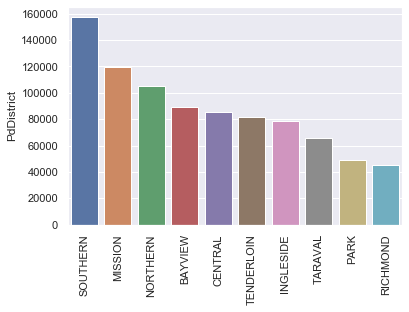

In [11]:
most_dangerous_districts = train_df.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

Clearly, there are differences in the occurrence of crimes through district.

Now let's take a look at the categories of crimes..

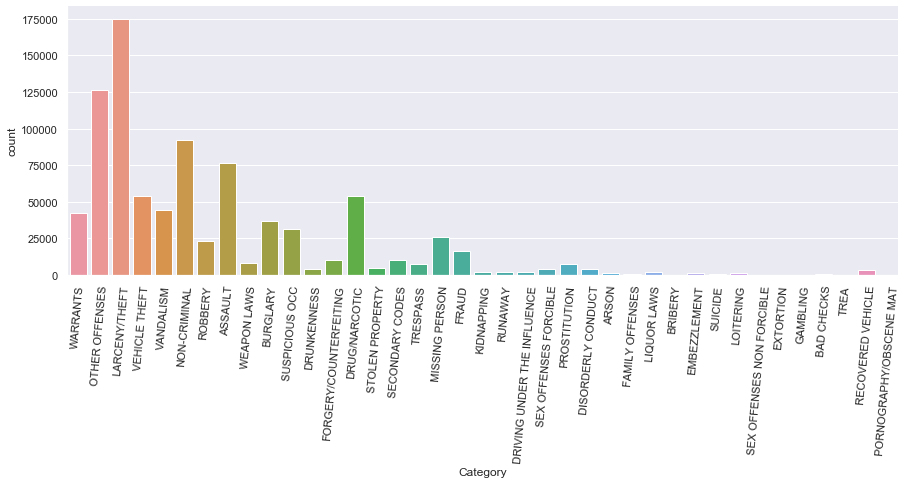

In [12]:
x = sns.catplot('Category', data = train_df, kind = 'count', aspect = 3, height = 4.5)
x.set_xticklabels(rotation = 85)

There are 39 discrete categories that the police department file the incidents, with the most common being Larceny/Theft.

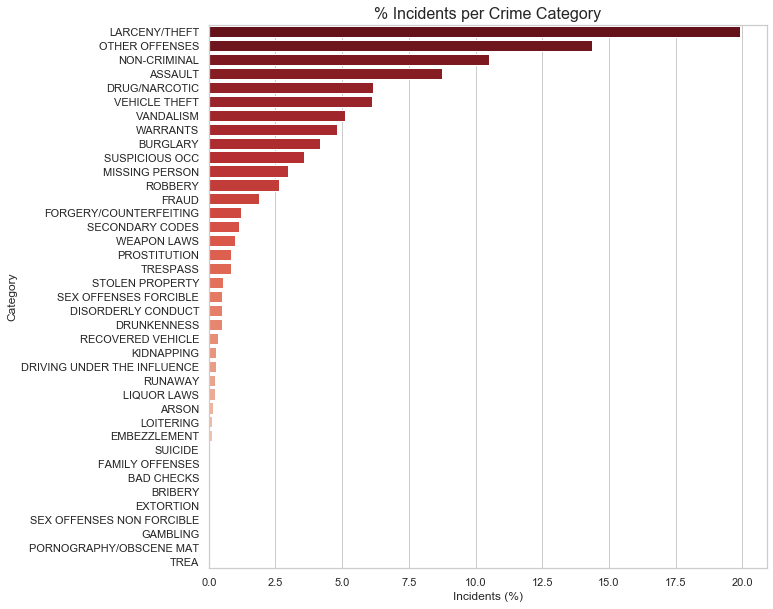

In [13]:
data = train_df.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Reds_r")

plt.title('% Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

What about Dates and Weekday??

Let's first check the format used for the days of week and see how many crimes do we have for each of them.

In [14]:
train_df.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

Not so much to say here: the full names of the days are used and it seems that there are no material differences in terms of total number of crimes for each day of the week.

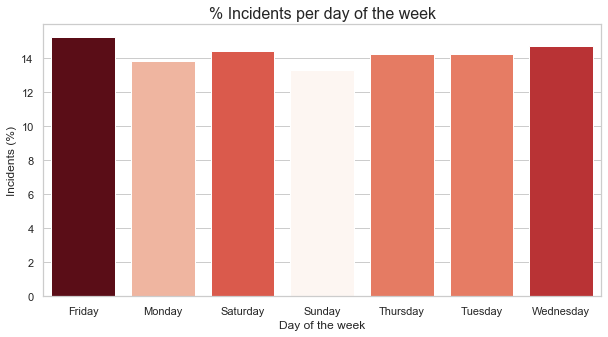

In [15]:
from matplotlib import cm
data = train_df.groupby('DayOfWeek').count().iloc[:, 0]
plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('% Incidents per day of the week', fontdict={'fontsize': 16})
plt.xlabel('Day of the week')
plt.ylabel('Incidents (%)')

plt.show()

Let's check the format used for the Dates..

In [16]:
train_df.Dates

0         2015-05-13 23:53:00
1         2015-05-13 23:53:00
2         2015-05-13 23:33:00
3         2015-05-13 23:30:00
4         2015-05-13 23:30:00
                 ...         
878044    2003-01-06 00:15:00
878045    2003-01-06 00:01:00
878046    2003-01-06 00:01:00
878047    2003-01-06 00:01:00
878048    2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: object

It would be appropriate to divide time and date in the train and test set.

For now let's have a look to the number of cases hourly by district..

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


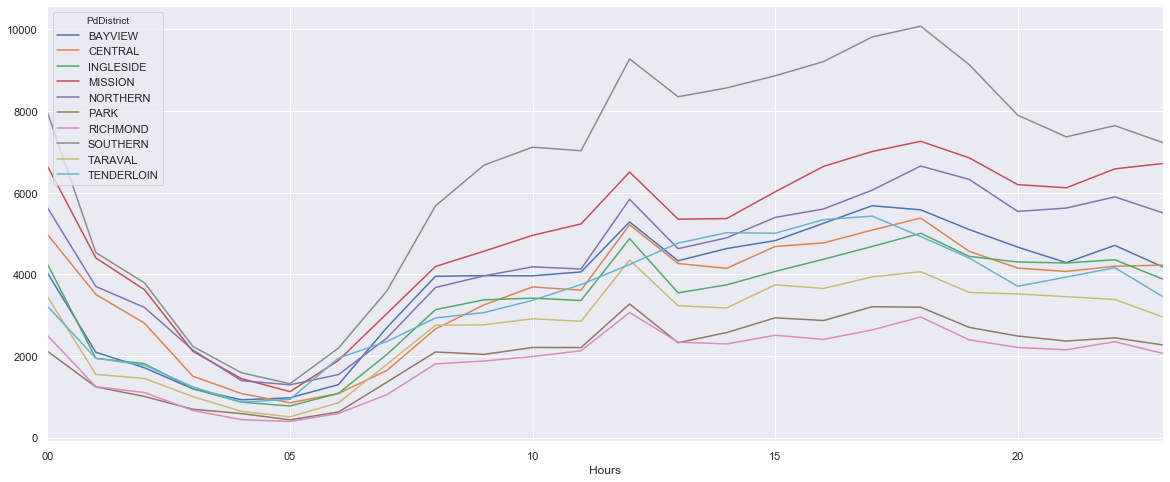

In [17]:
hours = pd.to_datetime(train_df.Dates).dt.strftime('%H')

hourly = train_df[['PdDistrict']]
hourly['Hours'] = hours

hourly = pd.crosstab([hourly.Hours], hourly.PdDistrict).reset_index()
grab_dists = hourly.iloc[:, 1:]
hourly.plot(x='Hours', y=grab_dists.columns, figsize=(20, 8))

As we can see in the graph, the number of crimes fall between midnight and 5:00am for each district and the greatest number of crimes occur around 6:00pm .

In [18]:
data = train_df.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)

## Feature Engineering

Splitting Dates in Time and Date for train and test dataframes

In [19]:
train_df['Dates'] = pd.to_datetime(train_df.Dates)
train_df['Times'] = train_df['Dates'].dt.strftime('%H:%M')
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30


In [20]:
train_df['Date'] = train_df['Dates'].dt.date
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times,Date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13


In [21]:
test_df['Dates'] = pd.to_datetime(test_df.Dates)
test_df['Dates']

0        2015-05-10 23:59:00
1        2015-05-10 23:51:00
2        2015-05-10 23:50:00
3        2015-05-10 23:45:00
4        2015-05-10 23:45:00
                 ...        
884257   2003-01-01 00:01:00
884258   2003-01-01 00:01:00
884259   2003-01-01 00:01:00
884260   2003-01-01 00:01:00
884261   2003-01-01 00:01:00
Name: Dates, Length: 884262, dtype: datetime64[ns]

In [22]:
test_df['Times'] = test_df['Dates'].dt.strftime('%H:%M')
test_df['Date'] = test_df['Dates'].dt.date
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Times,Date
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23:59,2015-05-10
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23:51,2015-05-10
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23:50,2015-05-10
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10


In [23]:
train_df = train_df.drop(['Dates'], axis = 1)
test_df = test_df.drop(['Dates'], axis = 1)
combine = [train_df, test_df]

Splitting Times in hours and minutes, calculate and round up Times

In [24]:
train_df[["Hours", "Minutes"]] = train_df['Times'].str.split(':', expand=True).astype(int)
train_df['minutes_as_fractions'] = train_df['Minutes']/60
train_df['hours_plus_minutes'] = train_df['Hours']+ train_df['minutes_as_fractions']
train_df['Rounded Times'] = train_df['hours_plus_minutes'].round(decimals=0).astype(int)
train_df.drop(['hours_plus_minutes', 'minutes_as_fractions', 'Minutes', 'Hours', 'Times'], axis=1, inplace=True)

In [25]:
test_df[["Hours", "Minutes"]] = test_df['Times'].str.split(':', expand=True).astype(int)
test_df['minutes_as_fractions'] = test_df['Minutes']/60
test_df['hours_plus_minutes'] = test_df['Hours']+ test_df['minutes_as_fractions']
test_df['Rounded Times'] = test_df['hours_plus_minutes'].round(decimals=0).astype(int)
test_df.drop(['hours_plus_minutes', 'minutes_as_fractions', 'Minutes', 'Hours', 'Times'], axis=1, inplace=True)

In [26]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year
train_df['Day'] = train_df['Date'].dt.day

In [27]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year
test_df['Day'] = test_df['Date'].dt.day

In [28]:
train_df.drop(['Date'], axis=1, inplace=True)
test_df.drop(['Date'], axis=1, inplace=True)

In [29]:
combine = [train_df, test_df]

Converting day of the week from string to number

In [30]:
DayOfWeek_mapping = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
for dataset in combine:
    dataset['Day_of_Week'] = dataset['DayOfWeek'].map(DayOfWeek_mapping)

In [31]:
train_df = train_df.drop(['DayOfWeek'], axis=1)
test_df = test_df.drop(['DayOfWeek'], axis=1)
combine = [train_df, test_df]

Converting districts into numbers

In [32]:
District_mapping = {'SOUTHERN':1, 'MISSION':2, 'NORTHERN':3, 'BAYVIEW':4, 'CENTRAL':5, 'TENDERLOIN':6, 'INGLESIDE':7, 'TARAVAL':8, 'PARK':9, 'RICHMOND':10}
for dataset in combine:
    dataset['Pd_District'] = dataset['PdDistrict'].map(District_mapping)
    
train_df.drop(['PdDistrict'], axis=1, inplace=True)
test_df.drop(['PdDistrict'], axis=1, inplace=True)


Dropping Resolution and Descript columns, which are just a description of the y categories

In [33]:
train_df.drop(['Resolution'], axis=1, inplace=True)
train_df.drop(['Descript'], axis = 1, inplace=True)

Converting Categories into numbers


In [34]:
unique_categories = list(train_df['Category'].unique())

my_categories = {}

categories_count = 0

for i_category in unique_categories:
    
    categories_count = categories_count + 1
    my_categories[i_category] = categories_count
    
train_df['Category'] = train_df['Category'].map(my_categories)

In [35]:
train_df.head()

,Category,Address,X,Y,Rounded Times,Month,Year,Day,Day_of_Week,Pd_District
0,1,OAK ST / LAGUNA ST,-122.425892,37.774599,24,5,2015,13,3,3
1,2,OAK ST / LAGUNA ST,-122.425892,37.774599,24,5,2015,13,3,3
2,2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,24,5,2015,13,3,3
3,3,1500 Block of LOMBARD ST,-122.426995,37.800873,24,5,2015,13,3,3
4,3,100 Block of BRODERICK ST,-122.438738,37.771541,24,5,2015,13,3,9


From the ‘Address’ field we extracted if the incident has taken place in a crossroad or on a building block.

In [36]:
combine = [train_df, test_df]

In [37]:
for dataset in combine:
 dataset['Block'] = dataset['Address'].str.contains('block', case=False)
 dataset['Block'] = dataset['Block'].map(lambda x: 1 if  x == True else 0)
    
train_df.drop(['Address'], axis=1, inplace=True)
test_df.drop(['Address'], axis = 1, inplace=True)

combine = [train_df, test_df]

We eliminate the coordinates, since we will use Pd_District.


In [38]:
#train_df.drop([['X', 'Y'], axis=1, inplace=True)
#test_df.drop([['X', 'Y'], axis=1, inplace=True)
#combine = [train_df, test_df]              

In [39]:
train_df.head()

,Category,X,Y,Rounded Times,Month,Year,Day,Day_of_Week,Pd_District,Block
0,1,-122.425892,37.774599,24,5,2015,13,3,3,0
1,2,-122.425892,37.774599,24,5,2015,13,3,3,0
2,2,-122.424363,37.800414,24,5,2015,13,3,3,0
3,3,-122.426995,37.800873,24,5,2015,13,3,3,1
4,3,-122.438738,37.771541,24,5,2015,13,3,9,1


## Machine learning models

The distinction between the training set, validation set, and the test set is fundamentally important to applying machine learning methods in practice. Evaluating more than one model on the test set and choesing the better of the two will result in a overly optimistic estimate of how accurate the model is.

split the training data into training+validation set and test set

In [40]:
X = train_df.drop("Category", axis=1)
y = train_df["Category"]
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

split train+validation set into training and validation set

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

### Decision Trees 

In [42]:
train_df.head()

,Category,X,Y,Rounded Times,Month,Year,Day,Day_of_Week,Pd_District,Block
0,1,-122.425892,37.774599,24,5,2015,13,3,3,0
1,2,-122.425892,37.774599,24,5,2015,13,3,3,0
2,2,-122.424363,37.800414,24,5,2015,13,3,3,0
3,3,-122.426995,37.800873,24,5,2015,13,3,3,1
4,3,-122.438738,37.771541,24,5,2015,13,3,9,1


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [44]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [45]:
print("Train accuracy:" + str(np.round(tree.score(X_train, y_train),2)))
print("Validation accuracy:" +  str(np.round(tree.score(X_valid, y_valid),2)))

Train accuracy:0.9
Validation accuracy:0.22


As we can see, the deafault setting of fully developing the tree causes overfitting!!

#### Exploring max_depth

Let's try to set max_deph. It's a pre-pruning method, which will stop developing the tree before we perfectly fit to the training data.

In [46]:
tree_scores = {}
tree_scores['max_depth'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for max_depht in np.arange(1,16,1):
    tree = DecisionTreeClassifier(max_depth=max_depht, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['max_depth'].append(max_depht)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))


In [47]:
my_df = pd.DataFrame(tree_scores)
my_df

,max_depth,Train accuracy,Validation accuracy
0,1,0.203231,0.203384
1,2,0.217450,0.217324
2,3,0.220598,0.220216
3,4,0.226851,0.227019
4,5,0.235215,0.235547
5,6,0.244085,0.243546
6,7,0.252601,0.252044
7,8,0.260163,0.258725
8,9,0.266684,0.262516
9,10,0.274322,0.267095


As we can see, in this case the best value for max_depth hyperparameter is 13. However, both training and validation accuracy aren't high..

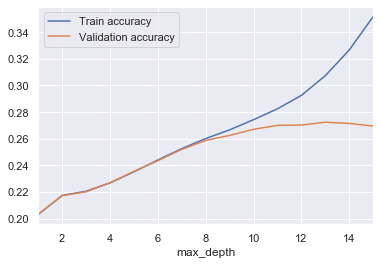

In [48]:
my_df.plot(x='max_depth')

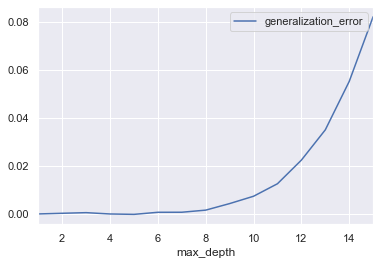

In [49]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','max_depth']].plot(x='max_depth')

 #### Exploring min_samples_split

Let's try to set min_samples_split. It is the minimum number of samples required to split an internal node

In [50]:
tree_scores = {}
tree_scores['min_samples_split'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_split in np.arange(10,800,20):
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['min_samples_split'].append(min_samples_split)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [51]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_split,Train accuracy,Validation accuracy
0,10,0.582640,0.225840
1,30,0.427540,0.248065
2,50,0.382483,0.258622
3,70,0.359430,0.264423
4,90,0.345560,0.268250
5,110,0.335836,0.270612
6,130,0.328486,0.272210
7,150,0.323026,0.274020
8,170,0.318636,0.275101
9,190,0.314842,0.275399


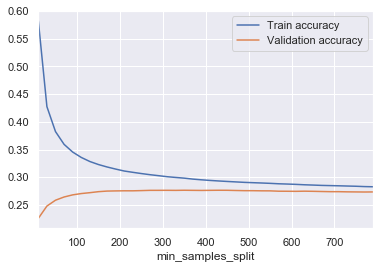

In [52]:
my_df.plot(x='min_samples_split')

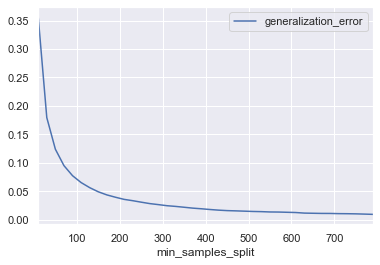

In [53]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','min_samples_split']].plot(x='min_samples_split')

#### Exploring min_samples_leaf

Let's try to set min_samples_leaf, that represents the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In [54]:
tree_scores = {}
tree_scores['min_samples_leaf'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_leaf in np.arange(2,35,1):
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores["min_samples_leaf"].append(min_samples_leaf)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [55]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_leaf,Train accuracy,Validation accuracy
0,2,0.695263,0.220653
1,3,0.613197,0.224832
2,4,0.559386,0.227669
3,5,0.520864,0.230754
4,6,0.492142,0.235522
5,7,0.470186,0.238359
6,8,0.452715,0.240855
7,9,0.438464,0.243650
8,10,0.426672,0.246517
9,11,0.417058,0.248430


Grid Search with Cross-validation

In [56]:
import numpy as np

In [57]:
param_grid = {'max_depth':[6, 12, 18], 'min_samples_split':[100, 300, 500, 700], 'min_samples_leaf':[10, 20, 30, 40, 50]}

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [59]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Validation set score:{:.2f}".format(grid_search.score(X_valid, y_valid)))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Validation set score:0.28
